In [1]:
%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load Data

In [3]:
df = pd.read_csv('../data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [4]:
df.shape

(9134, 24)

In [5]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 2. Variable Encoding

## 2.1. Response Variable: Response

In [50]:
def my_other_func(foo):
    return 1 if foo == 'Yes' else 0

my_other_func('Yes')

1

In [51]:
df['Engaged'] = df['Response'].apply(my_other_func)

In [52]:
df['Engaged'].mean()

0.14320122618786948

## 2.2. Features

In [8]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [9]:
continuous_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'
]

#### - Creating Dummy Variables

In [59]:
df['Vehicle Size'].head(20)

0     Medsize
1     Medsize
2     Medsize
3     Medsize
4     Medsize
5     Medsize
6     Medsize
7     Medsize
8     Medsize
9     Medsize
10      Small
11    Medsize
12    Medsize
13    Medsize
14    Medsize
15    Medsize
16    Medsize
17    Medsize
18    Medsize
19      Small
Name: Vehicle Size, dtype: object

In [68]:
pd.get_dummies(df['Sales Channel'])

,Agent,Branch,Call Center,Web
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
5,0,0,0,1
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,0,1,0,0


In [10]:
columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type', 
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]

categorical_features = []
for col in columns_to_encode:
    encoded_df = pd.get_dummies(df[col])
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
    
    categorical_features += list(encoded_df.columns)
    
    df = pd.concat([df, encoded_df], axis=1)

#### - Encoding Gender

In [63]:
df['Gender'].head(10)

0    F
1    F
2    F
3    M
4    M
5    F
6    F
7    M
8    M
9    F
Name: Gender, dtype: object

In [64]:
df['Is.Female']

0       1
1       1
2       1
3       0
4       0
5       1
6       1
7       0
8       0
9       1
10      0
11      1
12      0
13      0
14      0
15      1
16      0
17      0
18      0
19      1
20      0
21      1
22      0
23      1
24      1
25      0
26      1
27      1
28      1
29      1
       ..
9104    0
9105    0
9106    0
9107    0
9108    1
9109    0
9110    1
9111    0
9112    1
9113    1
9114    1
9115    1
9116    1
9117    1
9118    0
9119    0
9120    1
9121    1
9122    1
9123    1
9124    0
9125    0
9126    0
9127    0
9128    1
9129    0
9130    1
9131    0
9132    0
9133    0
Name: Is.Female, dtype: int64

In [66]:
female_mapping = lambda x: 1 if x == 'F' else 0

female_mapping('M')

0

In [67]:
df[['Gender', 'Is.Female']].head(10)

,Gender,Is.Female
0,F,1
1,F,1
2,F,1
3,M,0
4,M,0
5,F,1
6,F,1
7,M,0
8,M,0
9,F,1


In [11]:
df['Is.Female'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)

categorical_features.append('Is.Female')

#### - all features & response 

In [69]:
all_features = continuous_features + categorical_features
response = 'Engaged'

In [1]:
categorical_features

NameError: name 'categorical_features' is not defined

In [72]:
x = 'Sales Channel'
x.replace(' ', '.')

'Sales.Channel'

In [70]:
sample_df = df[all_features + [response]]
sample_df.columns = [x.replace(' ', '.') for x in sample_df.columns]
all_features = [x.replace(' ', '.') for x in all_features]

In [71]:
sample_df.head()

,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Sales.Channel.Agent,Sales.Channel.Branch,...,Education.Bachelor,Education.College,Education.Doctor,Education.High.School.or.Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium,Is.Female,Engaged
0,2763.519279,56274,69,32,5,0,1,384.811147,1,0,...,1,0,0,0,0,1,0,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,1,0,0,0,0,0,1,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,1,0,...,1,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2813.692575,43836,73,12,44,0,1,138.130879,1,0,...,1,0,0,0,0,1,0,0,0,0


# 3. Training & Testing

In [15]:
from sklearn.model_selection import train_test_split

In [75]:
#x_train, x_test = train_test_split(sample_df, test_size=0.3)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(sample_df[['']], sample_df[response], test_size=0.3)

In [78]:
sample_df.shape

(9134, 51)

In [79]:
x_train.shape

(6393, 50)

In [19]:
x_test.shape

(2741, 50)

## 3.1. Building RandomForest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [21]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)

In [22]:
rf_model.fit(X=x_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### - Individual Trees

In [23]:
rf_model.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=961533479, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=623543440, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fracti

In [24]:
rf_model.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=961533479, splitter='best')

In [80]:
rf_model.estimators_[0].predict_proba(x_test)[:10]

array([[0.85294118, 0.14705882],
       [0.96768982, 0.03231018],
       [0.87219888, 0.12780112],
       [0.86900958, 0.13099042],
       [0.77632534, 0.22367466],
       [0.87219888, 0.12780112],
       [0.87219888, 0.12780112],
       [0.87219888, 0.12780112],
       [0.77632534, 0.22367466],
       [0.87219888, 0.12780112]])

In [81]:
rf_model.estimators_[1].predict_proba(x_test)[:10]

array([[0.93302991, 0.06697009],
       [0.93302991, 0.06697009],
       [0.87301173, 0.12698827],
       [0.87301173, 0.12698827],
       [0.87301173, 0.12698827],
       [0.87301173, 0.12698827],
       [0.87301173, 0.12698827],
       [0.93302991, 0.06697009],
       [0.87301173, 0.12698827],
       [0.87301173, 0.12698827]])

In [27]:
rf_model.estimators_[2].predict(x_test)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
rf_model.estimators_[3].predict(x_test)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
rf_model.estimators_[4].predict(x_test)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### - Feature Importances

In [30]:
rf_model.feature_importances_

array([0.06367979, 0.09365597, 0.05216913, 0.02686112, 0.0485627 ,
       0.01237066, 0.01769078, 0.07590682, 0.03454722, 0.00738817,
       0.00716702, 0.00536998, 0.00697789, 0.00886572, 0.01046109,
       0.00376871, 0.00071658, 0.00286988, 0.00372062, 0.00697186,
       0.00285342, 0.00089982, 0.00100336, 0.00097627, 0.00145712,
       0.0009745 , 0.00102094, 0.00089645, 0.00074777, 0.00103634,
       0.00101478, 0.00066986, 0.00122333, 0.00412169, 0.03565506,
       0.00557545, 0.29596743, 0.02106566, 0.05263857, 0.02396627,
       0.01360938, 0.00347069, 0.00444472, 0.00556041, 0.00408741,
       0.00664231, 0.0044499 , 0.00399568, 0.00281821, 0.00743547])

In [31]:
feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_, all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']

feature_importance_df.sort_values(by='feature.importance', ascending=False)

,feature.importance,feature
36,0.295967,EmploymentStatus.Retired
1,0.093656,Income
7,0.075907,Total.Claim.Amount
0,0.063680,Customer.Lifetime.Value
38,0.052639,Marital.Status.Divorced
2,0.052169,Monthly.Premium.Auto
4,0.048563,Months.Since.Policy.Inception
34,0.035655,EmploymentStatus.Employed
8,0.034547,Sales.Channel.Agent
3,0.026861,Months.Since.Last.Claim


## 3.2. Evaluating Models

#### - Accuracy, Precision, and Recall

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [33]:
in_sample_preds = rf_model.predict(x_train)
out_sample_preds = rf_model.predict(x_test)

In [34]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8788
Out-of-Sample Accuracy: 0.8705


In [35]:
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

In-Sample Precision: 0.9927
Out-of-Sample Precision: 0.8772


In [36]:
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Recall: 0.1495
Out-of-Sample Recall: 0.1256


#### - ROC & AUC

In [37]:
from sklearn.metrics import roc_curve, auc

In [38]:
in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]

In [39]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [40]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8695
Out-Sample AUC: 0.8057


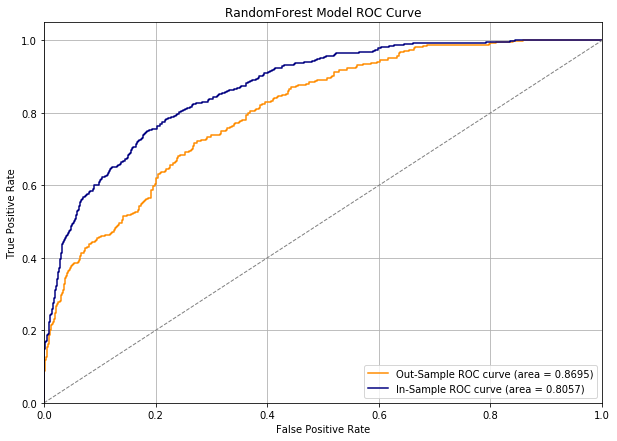

In [41]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()